In [1]:
# luisa dos Santos Neves - RM 551889
# Gabriel Aparecido Cassalho - RM 99794 
# Pedro Henrique Silva -  RM 98804

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, pearsonr
from scipy.stats import f_oneway

In [4]:
dados = pd.read_csv('Cities1.csv')
len(dados.columns)

# 5 Colunas

5

In [9]:
# Tipos de variáveis e valores nulos
dados.info()

# Descrição estatística das variáveis numéricas
dados.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   object 
 1   Region          3538 non-null   object 
 2   Country         3963 non-null   object 
 3   AirQuality      3963 non-null   float64
 4   WaterPollution  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


,AirQuality,WaterPollution
count,3963.000000,3963.000000
mean,62.253452,44.635372
std,30.944753,25.663910
min,0.000000,0.000000
25%,37.686567,25.000000
50%,69.444444,50.000000
75%,87.500000,57.719393
max,100.000000,100.000000


In [10]:
# Estatísticas descritivas
statistics = dados.describe()

# Estatísticas por grupo (por país)
grouped_statistics = dados.groupby('Country').describe()
statistics, grouped_statistics


(        AirQuality  WaterPollution
 count  3963.000000     3963.000000
 mean     62.253452       44.635372
 std      30.944753       25.663910
 min       0.000000        0.000000
 25%      37.686567       25.000000
 50%      69.444444       50.000000
 75%      87.500000       57.719393
 max     100.000000      100.000000,
             AirQuality                                                         \
                  count       mean        std        min        25%        50%   
 Country                                                                         
 Afghanistan        6.0  37.213694  36.242793   0.000000  12.938596  31.085526   
 Albania           12.0  51.873625  40.051927   0.000000  13.737624  58.333333   
 Algeria           17.0  57.607466  27.295630   0.000000  41.666667  50.000000   
 Andorra            2.0  43.750000   8.838835  37.500000  40.625000  43.750000   
 Angola             1.0  15.000000        NaN  15.000000  15.000000  15.000000   
 ...               

In [11]:

metrics_by_country = dados.groupby('Country').agg({
    'AirQuality': ['mean', 'std', 'min', 'max'],
    'WaterPollution': ['mean', 'std', 'min', 'max']
})
metrics_by_country

AirQuality                                   WaterPollution  \
                  mean        std        min         max           mean   
Country                                                                   
Afghanistan  37.213694  36.242793   0.000000  100.000000      53.440657   
Albania      51.873625  40.051927   0.000000  100.000000      57.834201   
Algeria      57.607466  27.295630   0.000000  100.000000      50.623043   
Andorra      43.750000   8.838835  37.500000   50.000000      25.000000   
Angola       15.000000        NaN  15.000000   15.000000      81.250000   
...                ...        ...        ...         ...            ...   
Venezuela    36.514509  30.086097   0.000000  100.000000      78.549637   
Vietnam      44.557443  25.341412  12.219101   75.000000      65.526918   
Yemen        39.583333  43.766531   0.000000  100.000000      85.416667   
Zambia       45.833333  36.324158   0.000000   75.000000      80.769231   
Zimbabwe     45.329670  18.163753  25.000000   67.857143      74.107143   

                                               
                   std        min         max  
Country                                        
Afghanistan  33.110138   0.000000   83.333333  
Albania      30.965095   0.000000  100.000000  
Algeria      32.571516   0.000000  100.000000  
Andorra       0.000000  25.000000   25.000000  
Angola             NaN  81.250000   81.250000  
...                ...        ...         ...  
Venezuela    27.925248  25.000000  100.000000  
Vietnam      12.451448  51.190476   77.761628  
Yemen        12.500000  75.000000  100.000000  
Zambia       37.190538  25.000000  100.000000  
Zimbabwe     10.361247  62.500000   87.500000  

[177 rows x 8 columns]

In [39]:
def mode(series):
    mode_vals = pd.Series.mode(series)
    if len(mode_vals) > 1:
        return mode_vals.tolist() 
    elif len(mode_vals) == 1:
        return mode_vals[0]  
    else:
        return None  

metrics_by_country = dados.groupby('Country').agg({
    'AirQuality': [ 'median', 'var', mode],
    'WaterPollution': [ 'median', 'var', mode]
})

metrics_by_country


AirQuality               \
                median          var   
Country                               
Afghanistan  31.085526  1313.540073   
Albania      58.333333  1604.156845   
Algeria      50.000000   745.051434   
Andorra      43.750000    78.125000   
Angola       15.000000          NaN   
...                ...          ...   
Venezuela    25.000000   905.173236   
Vietnam      50.961538   642.187180   
Yemen        29.166667  1915.509259   
Zambia       54.166667  1319.444444   
Zimbabwe     44.230769   329.921910   

                                                               WaterPollution  \
                                                          mode         median   
Country                                                                         
Afghanistan  [0.0, 11.11111111, 18.42105263, 43.75, 50.0, 1...      62.500000   
Albania                                           [0.0, 100.0]      62.500000   
Algeria                                                   50.0      50.000000   
Andorra                                           [37.5, 50.0]      25.000000   
Angola                                                    15.0      81.250000   
...                                                        ...            ...   
Venezuela                                                 25.0      95.714286   
Vietnam      [12.21910112, 15.70247934, 50.0, 51.92307692, ...      66.346154   
Yemen                   [0.0, 16.66666667, 41.66666667, 100.0]      83.333333   
Zambia                                                    75.0      99.038462   
Zimbabwe                [25.0, 38.46153846, 50.0, 67.85714286]      73.214286   

                                                                             
                     var                                               mode  
Country                                                                      
Afghanistan  1096.281231  [0.0, 31.25, 50.0, 75.0, 81.06060606, 83.33333...  
Albania       958.837130                                               62.5  
Algeria      1060.903645                                 [0.0, 50.0, 100.0]  
Andorra         0.000000                                               25.0  
Angola               NaN                                              81.25  
...                  ...                                                ...  
Venezuela     779.819500                                              100.0  
Vietnam       155.038555  [51.19047619, 54.16666667, 57.69230769, 75.0, ...  
Yemen         156.250000                                               75.0  
Zambia       1383.136095                                              100.0  
Zimbabwe      107.355442                    [62.5, 71.42857143, 75.0, 87.5]  

[177 rows x 6 columns]

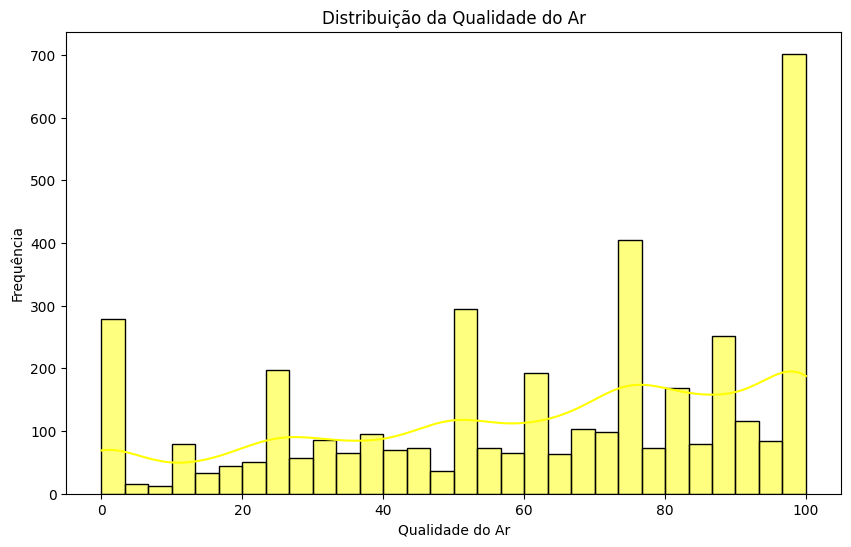

In [16]:
# Gráfico de distribuição da Qualidade do Ar
plt.figure(figsize=(10, 6))
sns.histplot(dados['AirQuality'], bins=30, kde=True, color='yellow')
plt.title('Distribuição da Qualidade do Ar')
plt.xlabel('Qualidade do Ar')
plt.ylabel('Frequência')
plt.show()


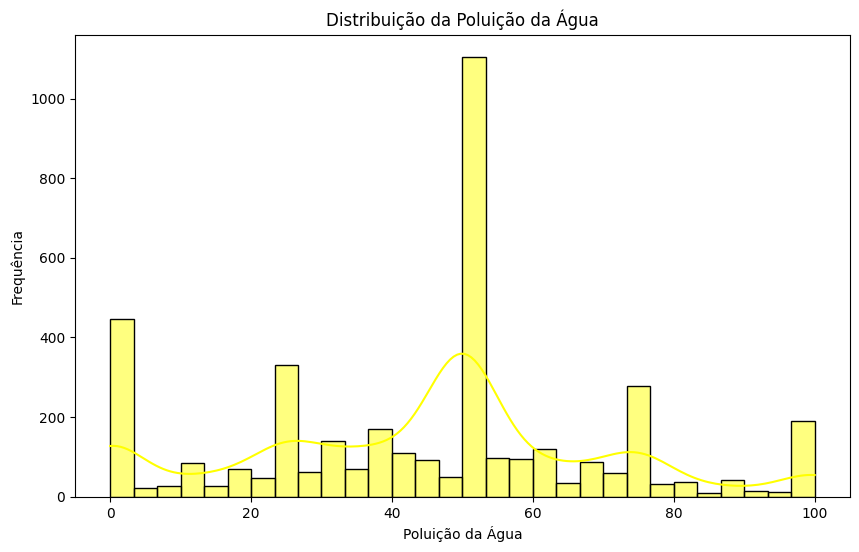

In [18]:
# Gráfico de distribuição da Poluição da Água

plt.figure(figsize=(10, 6))
sns.histplot(dados['WaterPollution'], bins=30, kde=True, color='yellow')
plt.title('Distribuição da Poluição da Água')
plt.xlabel('Poluição da Água')
plt.ylabel('Frequência')
plt.show()

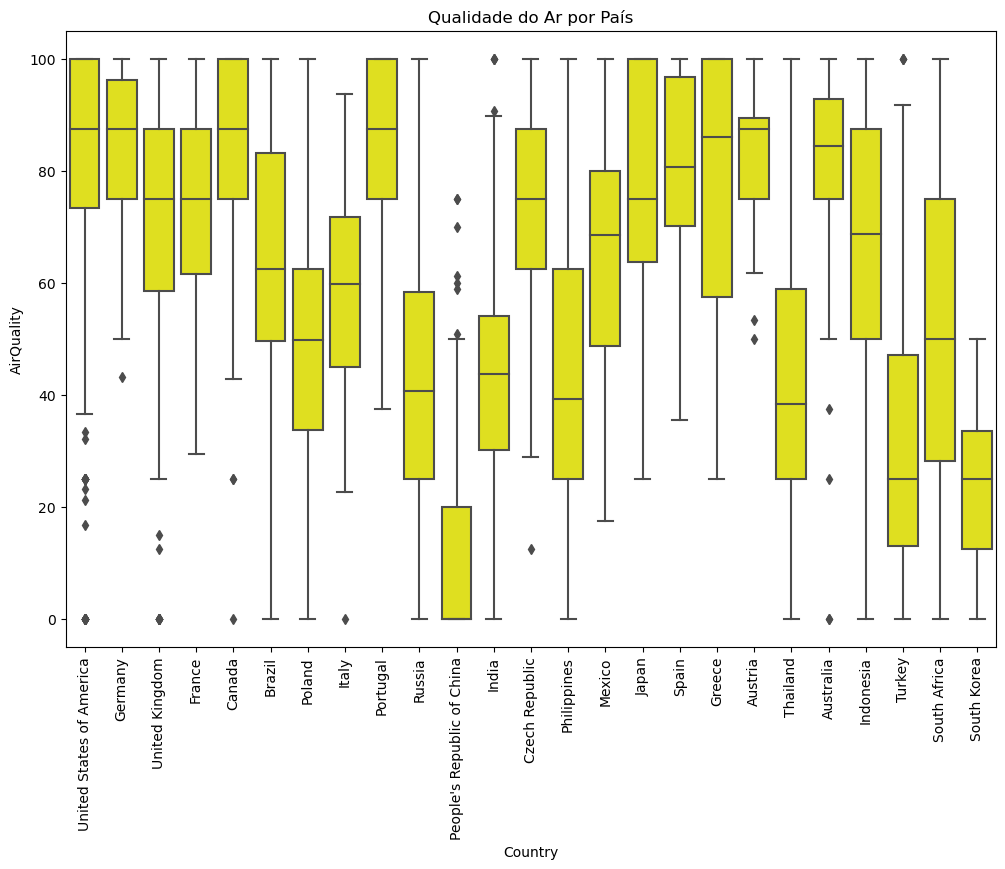

In [7]:


# Selecionando alguns
top25_countries = dados['Country'].value_counts().head(25).index
top25_data = dados[dados['Country'].isin(top25_countries)]

# Crie o gráfico com os 10 primeiros países
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='AirQuality', data=top25_data, color='yellow')
plt.title('Qualidade do Ar por País')
plt.xticks(rotation=90)
plt.show()



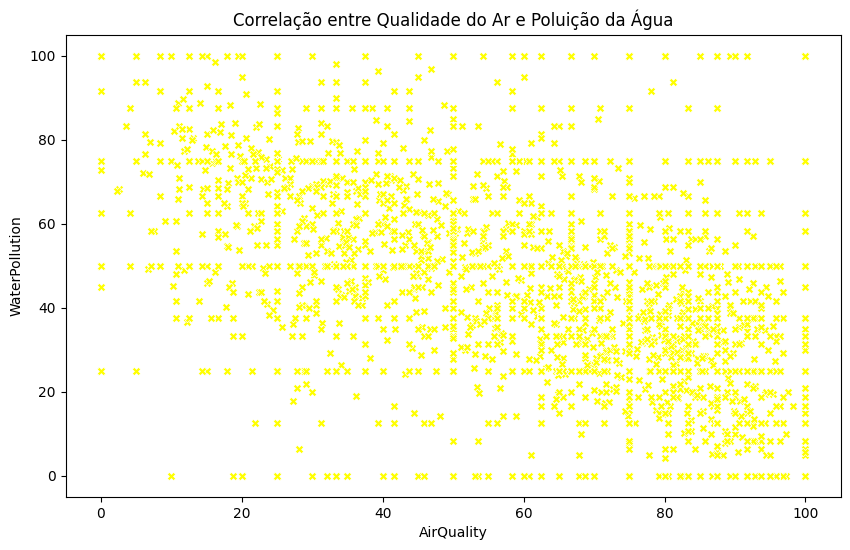

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AirQuality', y='WaterPollution', data=dados, color='yellow', marker='X')
plt.title('Correlação entre Qualidade do Ar e Poluição da Água')
plt.show()

In [9]:
# Teste T para comparar a qualidade do ar entre dois países específicos (ex: USA e Germany)
usa_air_quality = dados[dados['Country'] == 'United States of America']['AirQuality']
germany_air_quality = dados[dados['Country'] == 'Germany']['AirQuality']
ttest_result = ttest_ind(usa_air_quality, germany_air_quality, nan_policy='omit')

ttest_result


Ttest_indResult(statistic=2.7826362407215353, pvalue=0.005497246890010277)

In [14]:
can_air_quality = dados[dados['Country'] == 'Canada']['AirQuality']
japan_air_quality = dados[dados['Country'] == 'Japan']['AirQuality']
ttest_result2 = ttest_ind(can_air_quality, japan_air_quality, nan_policy='omit')

ttest_result2

Ttest_indResult(statistic=2.4670798298047587, pvalue=0.014488947880730813)

In [11]:
usa_water = dados[dados['Country'] == 'United States of America']['WaterPollution']
germany_water = dados[dados['Country'] == 'Germany']['WaterPollution']
ttest_result3 = ttest_ind(usa_water, germany_water, nan_policy='omit')

ttest_result3


Ttest_indResult(statistic=2.7826362407215353, pvalue=0.005497246890010277)

In [12]:
can_water = dados[dados['Country'] == 'Canada']['WaterPollution']
japan_water = dados[dados['Country'] == 'Japan']['WaterPollution']
ttest_result4 = ttest_ind(can_water, japan_water, nan_policy='omit')

ttest_result4


Ttest_indResult(statistic=-0.3618966586319105, pvalue=0.7178231348437929)

In [21]:
# Teste Anova
# Filtrar os dados para as três cidades específicas
cities = ['New York City', 'San Francisco', 'Los Angeles']
filtered_data = dados[dados['City'].isin(cities)]

# Separar os dados de qualidade do ar para cada cidade
ny_air_quality = filtered_data[filtered_data['City'] == 'New York City']['AirQuality']
sf_air_quality = filtered_data[filtered_data['City'] == 'San Francisco']['AirQuality']
la_air_quality = filtered_data[filtered_data['City'] == 'Los Angeles']['AirQuality']

# Realizar o Teste ANOVA
anova_result = f_oneway(ny_air_quality, sf_air_quality, la_air_quality)
anova_result



F_onewayResult(statistic=1.6170294056975263, pvalue=0.48598353636766306)

In [23]:
# Filtrar os dados para as três cidades específicas
cities = ['New York City', 'San Francisco', 'Los Angeles']
filtered_data = dados[dados['City'].isin(cities)]

# Separar os dados de qualidade do ar para cada cidade
ny_air_quality = filtered_data[filtered_data['City'] == 'New York City']['AirQuality']
sf_air_quality = filtered_data[filtered_data['City'] == 'San Francisco']['AirQuality']
la_air_quality = filtered_data[filtered_data['City'] == 'Los Angeles']['AirQuality']

# Realizar o Teste ANOVA
anova_result = f_oneway(ny_air_quality, sf_air_quality, la_air_quality)
anova_result

F_onewayResult(statistic=1.6170294056975263, pvalue=0.48598353636766306)

In [20]:
# Correlação

correlation = dados[['AirQuality', 'WaterPollution']].corr()
print(correlation)

                AirQuality  WaterPollution
AirQuality        1.000000       -0.454173
WaterPollution   -0.454173        1.000000
